<a href="https://colab.research.google.com/github/Victoras2007/PlayerGoalPrediction/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import numpy as np
import kagglehub
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# uploading dataset for players

df = pd.read_csv('/content/database.csv')

In [34]:
# uploding dataset for goalkeepers

dfg = pd.read_csv('/content/book3.csv')

In [27]:
dfg.describe()


,Rk,GA,Saves,Save%,PKsv,PKsv%
count,39.000000,39.000000,39.000000,39.000000,39.000000,24.000000
mean,20.000000,15.205128,31.794872,71.025641,0.205128,17.708333
std,11.401754,10.947673,23.277705,11.371102,0.469013,34.166446
min,1.000000,0.000000,1.000000,40.000000,0.000000,0.000000
25%,10.500000,5.000000,10.500000,66.300000,0.000000,0.000000
50%,20.000000,16.000000,28.000000,69.100000,0.000000,0.000000
75%,29.500000,26.000000,52.000000,76.000000,0.000000,25.000000
max,39.000000,35.000000,87.000000,100.000000,2.000000,100.000000


In [30]:
dfg.columns


Index(['Rk', 'Player', 'Nation', 'Position', 'Team', 'GA', 'Saves', 'Save%',
       'PKsv', 'PKsv%'],
      dtype='object')

In [35]:
# dropping columns not needed for our program

df.drop(columns=['Nation', '#','Age','Date','Assists','Non-Penalty xG (npxG)' , 'Penalty Shoot','Yellow Cards', 'Red Cards', 'Touches', 'Dribbles', 'Tackles', 'Blocks', 'Expected Assists (xAG)', 'Shot-Creating Actions', 'Passes Completed', 'Passes Attempted', 'Pass Completion %', 'Progressive Passes', 'Carries', 'Progressive Carries', 'Dribble Attempts', 'Goal-Creating Actions','Successful Dribbles'], inplace=True)

In [25]:
dfg.columns

Index(['Rk', 'Player', 'Nation', 'Position', 'Team', 'GA', 'Saves', 'Save%',
       'PKsv', 'PKsv%'],
      dtype='object')

In [9]:
df.isnull().sum()   # no missing values in df

,0
Player,0
Team,0
Nation,0
Position,0
Minutes,0
Goals,0
Penalty Shoot on Goal,0
Total Shoot,0
Shoot on Target,0
Expected Goals (xG),0


In [ ]:
dfg.isnull().sum()  # cheking for missing values

In [ ]:
dfg.isnull().sum() / len(df) * 100  # checking percentage of missing values

In [36]:
# since 35% of the data in the last row is missing we will drop it
dfg.dropna(axis='columns')

,Rk,Player,Nation,Position,Team,GA,Saves,Save%,PKsv
0,1,Alisson,br BRA,GK,Liverpool,10,20,66.7,0
1,2,Alphonse Areola,fr FRA,GK,West Ham,23,33,57.4,0
2,3,Kepa Arrizabalaga,es ESP,GK,Bournemouth,18,50,75.0,0
3,4,Brandon Austin,eng ENG,GK,Tottenham,2,2,50.0,0
4,5,Martin Dúbravka,sk SVK,GK,Newcastle Utd,1,7,87.5,0
5,6,Ederson,br BRA,GK,Manchester City,19,28,63.0,0
6,7,Łukasz Fabiański,pl POL,GK,West Ham,16,40,75.0,0
7,8,Mark Flekken,nl NED,GK,Brentford,35,87,71.9,0
8,9,Fraser Forster,eng ENG,GK,Tottenham,15,27,69.0,0
9,10,Dean Henderson,eng ENG,GK,Crystal Palace,28,55,65.9,1


In [ ]:
# view the new dataframe

df

In [ ]:
# view the new dataframe

dfg

In [ ]:
# visualising data using histograms for both DataFrames

In [ ]:
plt.figure(figsize=(100,100))
sns.histplot(x=df['Minutes'], bins=40, kde=True)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.title('Average Minutes Played by each Player', fontsize=120)
plt.xlabel('Minutes Played per 90mins', fontsize=80)
plt.ylabel('Frequency', fontsize=80)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(100,100))
sns.histplot(x=df['Penalty Shoot on Goal'], bins=40, kde=True)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.title('Average Penalty Shoots on Goal by each Player', fontsize=120)
plt.xlabel('Penalty Shoot on Goal per Match', fontsize=80)
plt.ylabel('Frequency', fontsize=80)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(100,100))
sns.histplot(x=df['Total Shoot'], bins=40, kde=True)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.title('Average Total Shoots by each Player', fontsize=120)
plt.xlabel('Total Shoots per Match', fontsize=80)
plt.ylabel('Frequuency', fontsize=80)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(100,100))
sns.histplot(x=df['Shoot on Target'], bins=40, kde=True)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.title('Average Shoots on Target by each Player', fontsize=120)
plt.xlabel('Total Shoot on Target per Match', fontsize=80)
plt.ylabel('Frequency', fontsize=80)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(100,100))
sns.histplot(x=df['Expected Goals (xG)'], bins=40, kde=True)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.title('Expected Goals by each Player', fontsize=120)
plt.xlabel('Expected Goals (xG) per Match', fontsize=80)
plt.ylabel('Frequency', fontsize=80)
plt.grid()
plt.show()

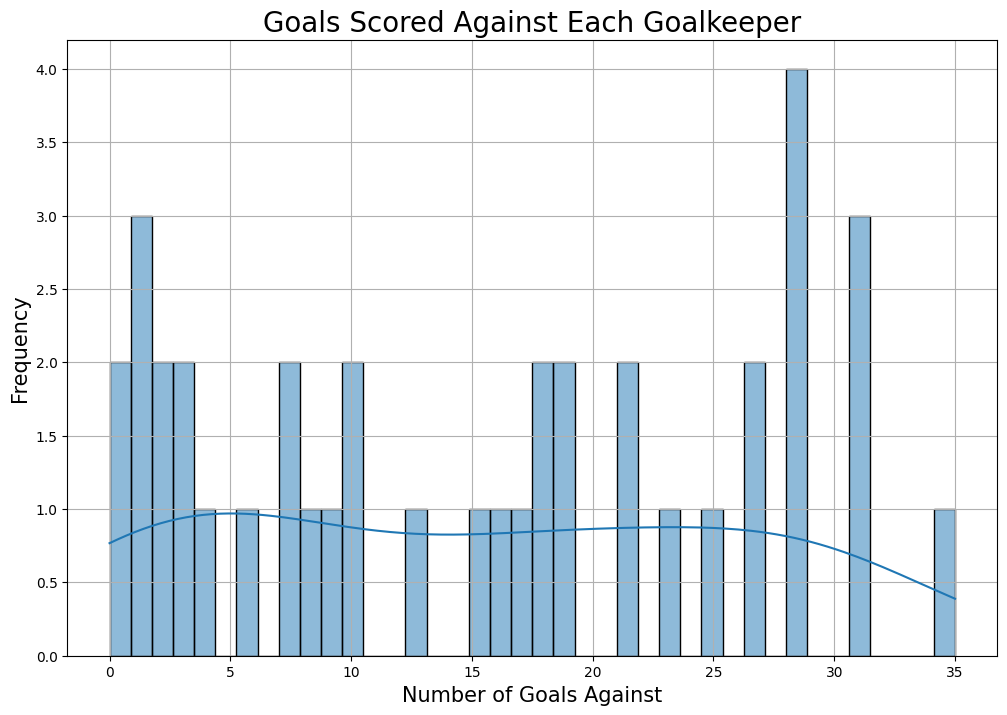

In [62]:
plt.figure(figsize=(12,8))
sns.histplot(x=dfg['GA'], bins=40, kde=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Goals Scored Against Each Goalkeeper', fontsize=20)
plt.xlabel('Number of Goals Against', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid()
plt.show()

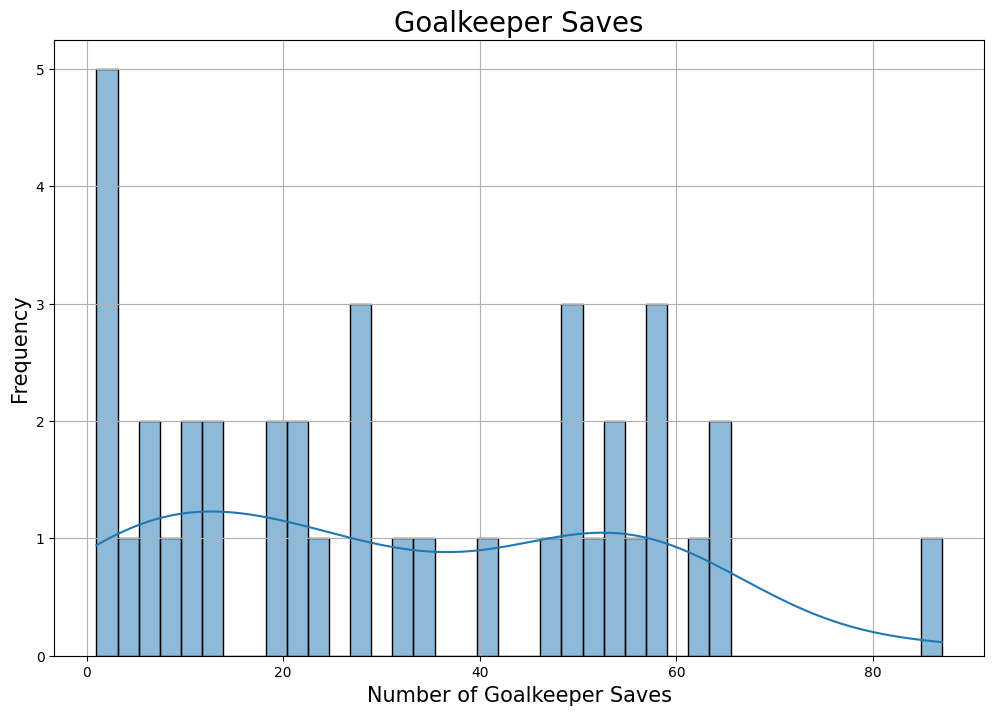

In [61]:
plt.figure(figsize=(12,8))
sns.histplot(x=dfg['Saves'], bins=40, kde=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Goalkeeper Saves', fontsize=20)
plt.xlabel('Number of Goalkeeper Saves', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(100,100))
sns.histplot(x=dfg['Save%'], bins=40, kde=True)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.title('Goalkeeper Saves Percentage', fontsize=120)
plt.xlabel('Percentage of Goalkeeper Saves', fontsize=80)
plt.ylabel('Frequency', fontsize=80)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(100,100))
sns.histplot(x=dfg['PKsv'], bins=40, kde=True)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.title('Penalty Kicks Saved', fontsize=120)
plt.xlabel('Number of Penalty Kicks Saved', fontsize=80)
plt.ylabel('Frequency', fontsize=80)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(100,100))
sns.histplot(x=dfg['PKsv%'], bins=40, kde=True)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.title('Penalty Kicks Saved Percentage', fontsize=120)
plt.xlabel('Percentage of Penalty Kicks Saved', fontsize=80)
plt.ylabel('Frequency', fontsize=80)
plt.grid()
plt.show()

In [38]:
df_new = df.drop(columns=['Player', 'Team', 'Position'])

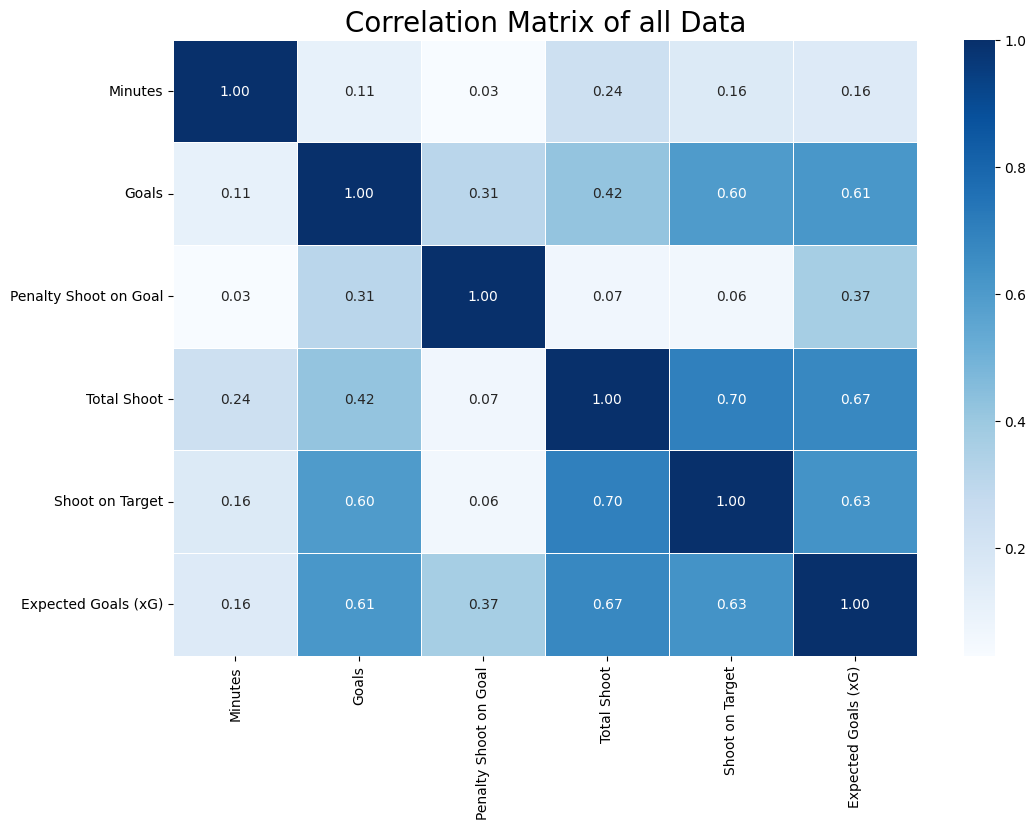

In [47]:
plt.figure(figsize=(12,8))
corr_matrix = df_new.corr()
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of all Data', fontsize=20)
plt.show()

In [49]:
df.columns

Index(['Player', 'Team', 'Position', 'Minutes', 'Goals',
       'Penalty Shoot on Goal', 'Total Shoot', 'Shoot on Target',
       'Expected Goals (xG)'],
      dtype='object')

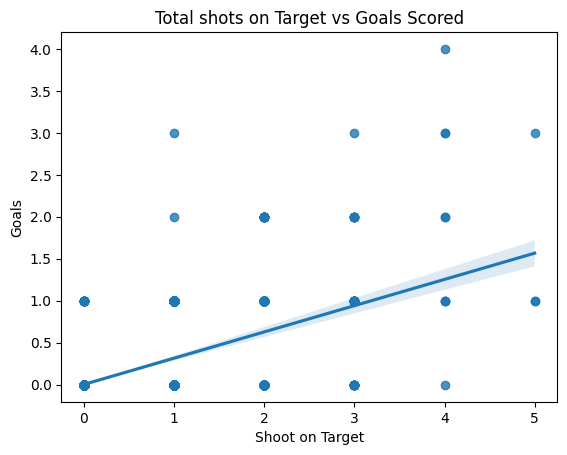

In [56]:
sns.regplot(x=df["Shoot on Target"], y=df["Goals"])
plt.title("Total shots on Target vs Goals Scored")
plt.show()

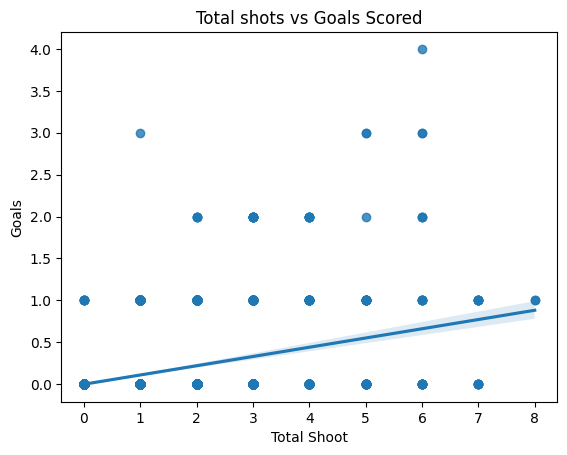

In [55]:
sns.regplot(x=df["Total Shoot"], y=df["Goals"])
plt.title("Total shots vs Goals Scored")
plt.show()

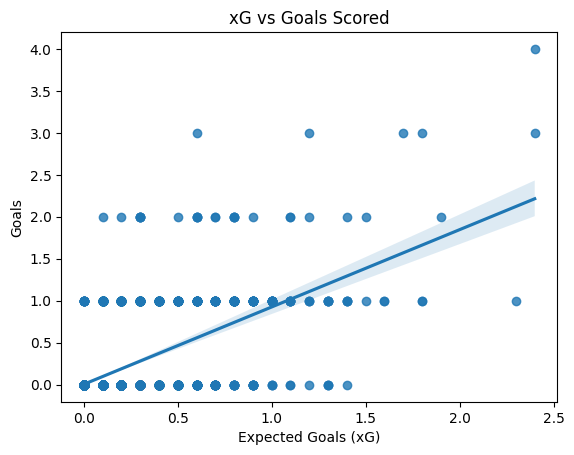

In [50]:
sns.regplot(x=df["Expected Goals (xG)"], y=df["Goals"])
plt.title("xG vs Goals Scored")
plt.show()

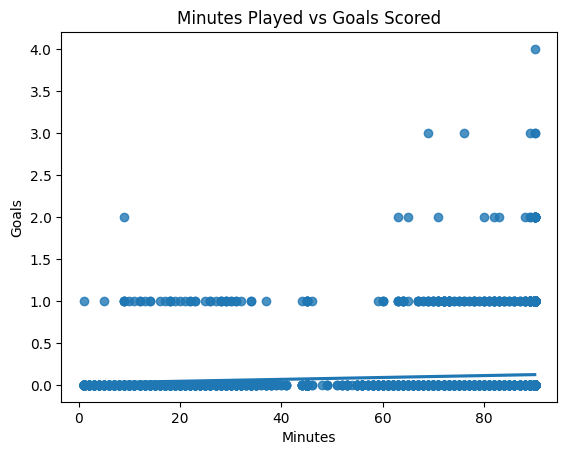

In [51]:
sns.regplot(x=df["Minutes"], y=df["Goals"])
plt.title("Minutes Played vs Goals Scored")
plt.show()